#### Support Vector Machines (SVM)
Support Vector Machines are a type of supervised machine learning algorithm that provides analysis of data for classification and regression analysis.  
 
#### How does it work?
According to SVM, we have to find the points that lie closest to both the classes. These points are known as support vectors.  
In the next step, we find the proximity between our dividing plane and the support vectors. The distance between the points and the dividing line is known as margin. The aim of an SVM algorithm is to maximize this very margin. When the margin reaches its maximum, the hyperplane becomes the optimal one.
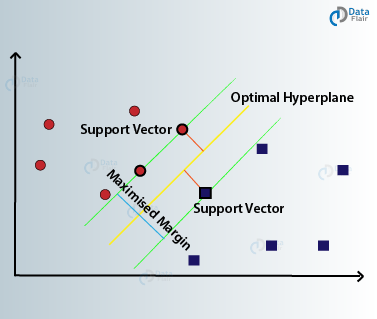
The SVM model tries to enlarge the distance between the two classes by creating a well-defined decision boundary. In the above case, our hyperplane divided the data. While our data was in 2 dimensions, the hyperplane was of 1 dimension. For higher dimensions, say, an n-dimensional Euclidean Space, we have an n-1 dimensional subset that divides the space into two disconnected components.  

#### Cost Function and Gradient Updates
In the SVM algorithm, we are looking to maximize the margin between the data points and the hyperplane. The loss function that helps maximize the margin is hinge loss.
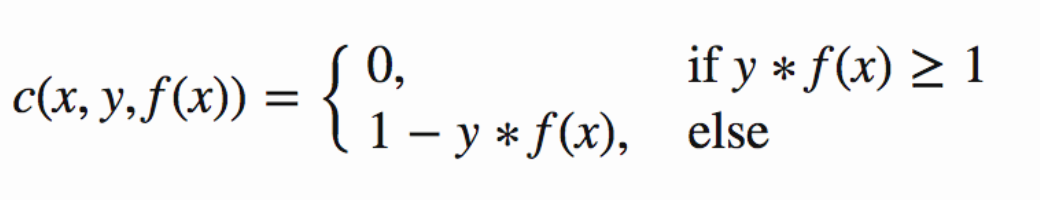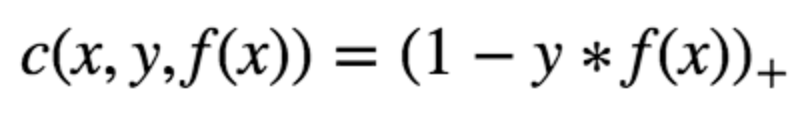
Now that we have the loss function, we take partial derivatives with respect to the weights to find the gradients. Using the gradients, we can update our weights.
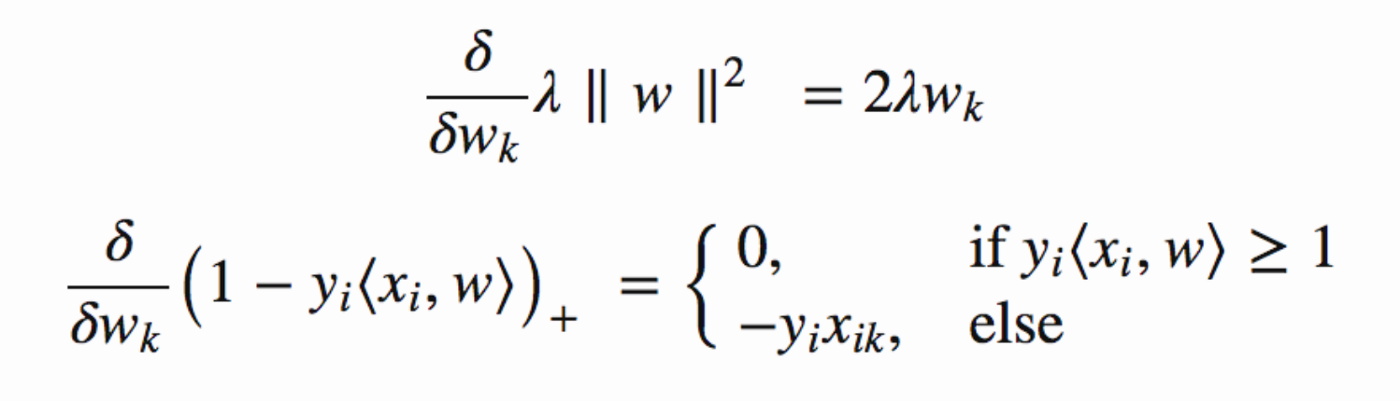
When there is no misclassification, i.e our model correctly predicts the class of our data point, we only have to update the gradient from the regularization parameter.
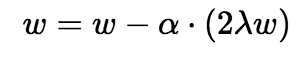
When there is a misclassification, i.e our model make a mistake on the prediction of the class of our data point, we include the loss along with the regularization parameter to perform gradient update.
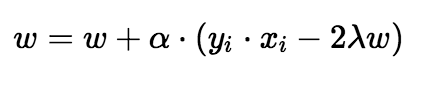

#### Advantages of SVM
- Guaranteed Optimality: Owing to the nature of Convex Optimization, the solution will always be global minimum not a local minimum.
- Abundance of Implementations: We can access it conveniently, be it from Python or Matlab.
- SVM can be used for linearly separable as well as non-linearly separable data. Linearly separable data is the hard margin whereas non-linearly separable data poses a soft margin.
- SVMs provide compliance to the semi-supervised learning models. It can be used in areas where the data is labeled as well as unlabeled. It only requires a condition to the minimization problem which is known as the Transductive SVM.
- Feature Mapping used to be quite a load on the computational complexity of the overall training performance of the model. However, with the help of Kernel Trick, SVM can carry out the feature mapping using simple dot product.

#### Disadvantages of SVM
- SVM is incapable of handling text structures. This leads to loss of sequential information and thereby, leading to worse performance.
- Vanilla SVM cannot return the probabilistic confidence value that is similar to logistic regression. This does not provide much explanation as confidence of prediction is important in several applications.
- Choice of the kernel is perhaps the biggest limitation of the support vector machine. Considering so many kernels present, it becomes difficult to choose the right one for the data.

#### How to tune SVM - Regularization
We can maintain regularization by adjusting it in the Scikit-learn’s C parameters. C denotes a penalty parameter representing an error or any form of misclassification. With this misclassification, one can understand how much of the error is actually bearable. Through this, you can nullify the compensation between the misclassified term and the decision boundary. With a smaller C value, we obtain hyperplane of small margin and with a larger C value, we obtain hyperplane of larger value.

https://data-flair.training/blogs/svm-support-vector-machine-tutorial/

In [2]:
import numpy as np

class SVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        y_ = np.where(y <= 0, -1, 1)

        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (
                        2 * self.lambda_param * self.w - np.dot(x_i, y_[idx])
                    )
                    self.b -= self.lr * y_[idx]

    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        return np.sign(approx)

X_train shape: (100, 2)
y_train shape: (100,)
[ 1.03144064 -1.30733302] 0.9000000000000007


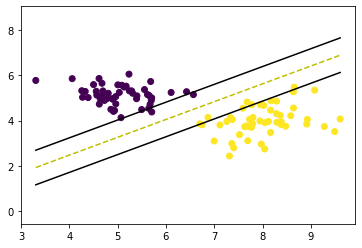

In [14]:
# Testing
if __name__ == "__main__":
    # Imports
    from sklearn import datasets
    import matplotlib.pyplot as plt
    
    # Test case
    n_sample = 50
    data1 = np.random.normal(loc=(8, 4), scale=0.6, size=(n_sample, 2))
    label1 = np.ones((n_sample, 1))
    data2 = np.random.normal(loc=(5, 5), scale=0.5, size=(n_sample, 2))
    label2 = np.zeros((n_sample, 1))
    X = np.vstack((data1, data2))
    y = np.vstack((label1, label2)).flatten()
    print("X_train shape: {}".format(X.shape))
    print("y_train shape: {}".format(y.shape))
    
    X_test = np.array([[6, 6], [4, 4], [9, 5], [8, 6]])
    y_test = np.array([[0], [0], [1], [1]])

    y = np.where(y == 0, -1, 1)

    clf = SVM()
    clf.fit(X, y)
    # predictions = clf.predict(X)

    print(clf.w, clf.b)

    def visualize_svm():
        def get_hyperplane_value(x, w, b, offset):
            return (-w[0] * x + b + offset) / w[1]

        fig = plt.figure()
        ax = fig.add_subplot(1, 1, 1)
        plt.scatter(X[:, 0], X[:, 1], marker="o", c=y)

        x0_1 = np.amin(X[:, 0])
        x0_2 = np.amax(X[:, 0])

        x1_1 = get_hyperplane_value(x0_1, clf.w, clf.b, 0)
        x1_2 = get_hyperplane_value(x0_2, clf.w, clf.b, 0)

        x1_1_m = get_hyperplane_value(x0_1, clf.w, clf.b, -1)
        x1_2_m = get_hyperplane_value(x0_2, clf.w, clf.b, -1)

        x1_1_p = get_hyperplane_value(x0_1, clf.w, clf.b, 1)
        x1_2_p = get_hyperplane_value(x0_2, clf.w, clf.b, 1)

        ax.plot([x0_1, x0_2], [x1_1, x1_2], "y--")
        ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], "k")
        ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], "k")

        x1_min = np.amin(X[:, 1])
        x1_max = np.amax(X[:, 1])
        ax.set_ylim([x1_min - 3, x1_max + 3])

        plt.show()

    visualize_svm()